In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
caminho_arquivo_excel = '/content/drive/MyDrive/ProjetoVeins/ModelosPreditivos/Dados_de_treinamento.xlsx'
df = pd.read_excel(caminho_arquivo_excel)
print(df.head())

   Meu ID  Minha Posição  ID do Vizinho  Posição do Vizinho  \
0      16        30.1000              0                 0.0   
1      16        32.4097              0                 0.0   
2      16        36.8948              0                 0.0   
3      16        43.2997              0                 0.0   
4      16        52.2323              0                 0.0   

  Distância Euclidiana   Minha Velocidade  Minha Aceleração  
0                    0                0.0         -nan m/s²  
1                    0           230972.0      2.30972 m/s²  
2                    0           448507.0      2.17535 m/s²  
3                    0           640496.0      1.91989 m/s²  
4                    0           893256.0      2.52761 m/s²  


In [4]:
series_contagem = []

contador_por_id = {}

for indice, linha in df.iterrows():
    id_atual = linha['Meu ID']

    # Se o id atual não existir no dicionário, inicializa o contador para 1
    if id_atual not in contador_por_id:
        contador_por_id[id_atual] = 1
    else:
        # Caso contrário, incrementa o contador
        contador_por_id[id_atual] += 1

    # Adiciona o valor do contador à lista
    series_contagem.append(contador_por_id[id_atual])


df['Tempo'] = series_contagem

print(df)

     Meu ID  Minha Posição  ID do Vizinho  Posição do Vizinho  \
0        16        30.1000              0                 0.0   
1        16        32.4097              0                 0.0   
2        16        36.8948              0                 0.0   
3        16        43.2997              0                 0.0   
4        16        52.2323              0                 0.0   
..      ...            ...            ...                 ...   
632      40       966.2530              0                 0.0   
633      40       978.3510              0                 0.0   
634      40       990.1390              0                 0.0   
635      40      1001.1900              0                 0.0   
636      40      1012.2000              0                 0.0   

    Distância Euclidiana   Minha Velocidade   Minha Aceleração  Tempo  
0                      0                0.0          -nan m/s²      1  
1                      0           230972.0       2.30972 m/s²      2  
2  

In [6]:
filtered_df = df[df['Meu ID'] == 16]
print(filtered_df)

     Meu ID  Minha Posição  ID do Vizinho  Posição do Vizinho  \
0        16        30.1000              0                 0.0   
1        16        32.4097              0                 0.0   
2        16        36.8948              0                 0.0   
3        16        43.2997              0                 0.0   
4        16        52.2323              0                 0.0   
..      ...            ...            ...                 ...   
138      16       958.0070              0                 0.0   
139      16       972.5460              0                 0.0   
140      16       987.6080              0                 0.0   
141      16      1001.8600              0                 0.0   
142      16      1016.4000              0                 0.0   

    Distância Euclidiana   Minha Velocidade  Minha Aceleração  Tempo  
0                      0                0.0         -nan m/s²      1  
1                      0           230972.0      2.30972 m/s²      2  
2     

In [10]:
# Reorganizando as colunas e removendo a coluna 'ID'
df_reorganized = filtered_df[['Tempo', 'Minha Velocidade', 'Minha Posição']] # Check for typos in column name

# Mostrando o DataFrame reorganizado
print("\nDataFrame Reorganizado:")
print(df_reorganized)

# Print the columns of filtered_df to verify if 'Minha Velocidade' exists
print(filtered_df.columns)

KeyError: "['Minha_Velocidade'] not in index"

In [ ]:
# Reorganizando as colunas e removendo a coluna 'ID'
df_reorganized = filtered_df[['Tempo', 'Minha_Velocidade', 'Minha Posição']] # Check for typos in column name

# Mostrando o DataFrame reorganizado
print("\nDataFrame Reorganizado:")
print(df_reorganized)

# Print the columns of filtered_df to verify if 'Minha Velocidade' exists
print(filtered_df.columns)

In [ ]:
print(df_reorganized.corr())

               Tempo  Velocidade   Posicao
Tempo       1.000000    0.811442  0.991612
Velocidade  0.811442    1.000000  0.733820
Posicao     0.991612    0.733820  1.000000


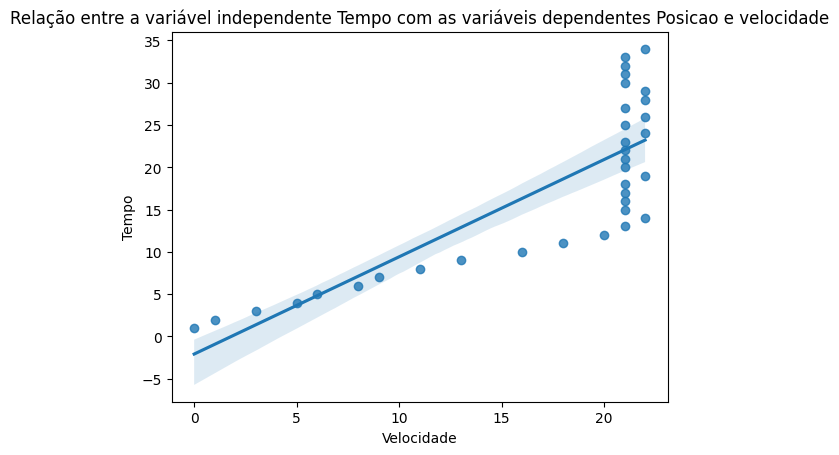

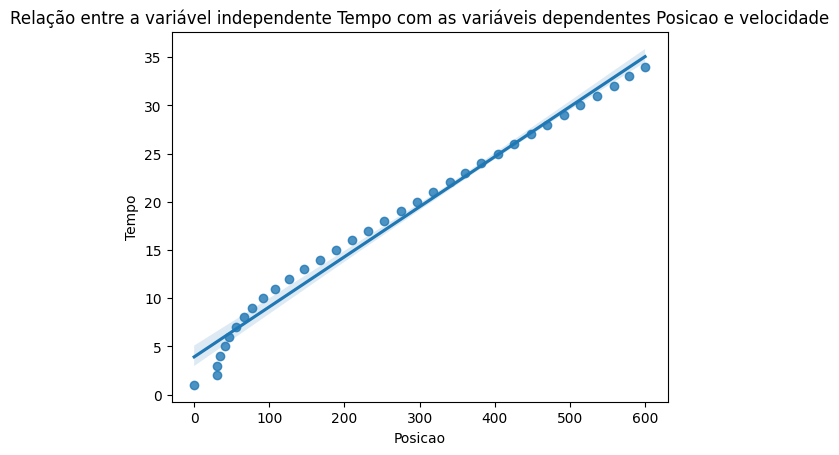

In [ ]:
# Mostra a relação da variável independente Tempo com as variáveis dependentes Velocidade e posição.

import seaborn as sns

variables = ['Velocidade', 'Posicao']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Tempo', data=df_reorganized).set(title=f'Relação entre a variável independente Tempo com as variáveis dependentes Posicao e velocidade');

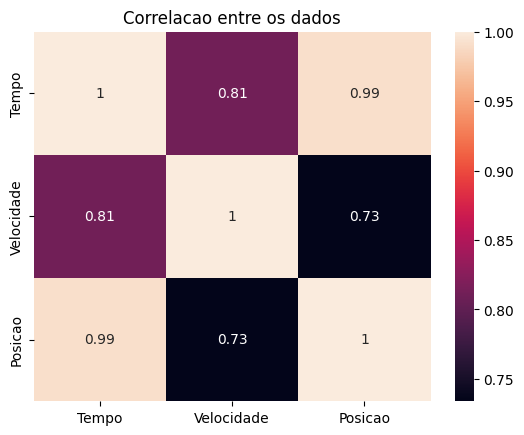

In [ ]:
# Correlação entre os dados do dataframe

correlations = df_reorganized.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Correlacao entre os dados');

In [ ]:
y = filtered_df['Posicao']
X = filtered_df[['Velocidade', 'Tempo']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42

In [ ]:
# Define que 30% dos dados serão para teste

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=SEED)

In [ ]:
X.shape

(34, 2)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Onde a reta cruza com o eixo

regressor.intercept_

-30.14360535409247

In [ ]:
# Importância de cada variável para o modelo

regressor.coef_

array([-5.53445371, 22.10467976])

In [ ]:
# Números que multiplicam as variáveis independentes para prever a variável dependente

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients_df)

            Coefficient value
Velocidade          -5.534454
Tempo               22.104680


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
resultado = pd.DataFrame({'Atual': y_test, 'Predicao': y_pred})
print(resultado)

    Atual    Predicao
15    210  207.307743
19    297  295.726462
27    470  467.029446
26    448  450.459220
8      77   96.850614
24    404  406.249861
21    340  339.935821
12    146  140.993704
32    579  583.087299
9      91  102.351933
0       0   -8.038926


In [ ]:
df_reorganized['Posicao_Antiga'] = df_reorganized['Posicao'].shift(1).fillna(0)

y = df_reorganized['Posicao']
X = df_reorganized[['Velocidade', 'Tempo', 'Posicao_Antiga']]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

intercept = regressor.intercept_
coefficients = regressor.coef_

print("Intercepto:", intercept)
print("Coeficientes:")
print(pd.DataFrame(coefficients, X.columns, columns=['Coefficient value']))

y_pred = regressor.predict(X_test)

resultado = pd.DataFrame({'Atual': y_test, 'Predicao': y_pred})

print("\nComparação entre valores reais e preditos:")
print(resultado)

def prever_proxima_posicao(velocidade, tempo, posicao_antiga):
    dados = pd.DataFrame({'Velocidade': [velocidade], 'Tempo': [tempo], 'Posicao_Antiga': [posicao_antiga]})
    proxima_posicao = regressor.predict(dados)
    return proxima_posicao[0]

velocidade_nova = 25
tempo_novo = 35
posicao_antiga = 600
proxima_posicao = prever_proxima_posicao(velocidade_nova, tempo_novo, posicao_antiga)
print(f"\nA próxima posição prevista é: {proxima_posicao}")

Intercepto: 4.8813154318359295
Coeficientes:
                Coefficient value
Velocidade               0.174044
Tempo                    1.284669
Posicao_Antiga           0.948899

Comparação entre valores reais e preditos:
    Atual    Predicao
15    210  208.432877
19    297  295.176877
27    470  469.787820
26    448  447.453326
8      77   81.333250
24    404  403.132427
21    340  338.548877
12    146  144.798226
32    579  580.416024
9      91   93.577942
0       0    6.165984

A próxima posição prevista é: 623.5353008356564


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

In [ ]:
# O modelo pode errar na previsão adicionando ou subtraindo 2.63 do valor real

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2.01
Mean squared error: 6.90
Root mean squared error: 2.63


In [ ]:
# Quantifica quanto da variância da variável dependente está sendo explicada pelo modelo

actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9997839262458228


In [ ]:
# Explica que o modelo atual explica apenas 99% dos nossos dados de teste

regressor.score(X_train, y_train)

0.9991766338047077